## 분석 목표:

1. 중점관리 키워드, 저효율 키워드 추출
2. 중점 관리 광고그룹, 저효율 광고그룹 추출


## 분석과정

1. 데이터 전처리
2. 데이터 탐색
3. 시각화
4. 데이터분석

# 1.데이터 전처리

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
# matplotlib 한글 폰트 출력코드

import matplotlib
from matplotlib import font_manager, rc
import platform


# 윈도우
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# read_excel 함수를 사용하여 파이썬 데이터 불러오기
df=pd.read_excel('../data/네이버보고서.xls')
df.head()

,"캠페인보고서(2019.02.01.~2019.04.30.),ftasia",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
1,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
2,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
3,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.66358,1568699
4,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174


### 불필요한 행 제거(첫 행 삭제)

In [4]:
df=pd.read_excel('../data/네이버보고서.xls', skiprows=[0])
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


### 결측치 확인

In [5]:
df.isnull().sum() # 열단위

광고그룹               0
키워드                0
노출수                0
클릭수                0
클릭률(%)             0
평균클릭비용(VAT포함,원)    0
총비용(VAT포함,원)       0
dtype: int64

In [6]:
df.isnull().sum(axis=1) # 행단위

0       0
1       0
2       0
3       0
4       0
       ..
1376    0
1377    0
1378    0
1379    0
1380    0
Length: 1381, dtype: int64

### 데이터프레임의 열 단위 수치연산 및 데이터 타입 다루기

- 클릭수(반올림처리, 일의 자리수로 변경)
- 클릭률
- 평균클릭비용(VAT포함, 원)

In [7]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.0,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.0,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.0,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.6,0.268489,630.593475,1175174
4,3. html,HTML,9626374,813.6,0.008452,1408.435349,1145903


In [8]:
# 클릭수 열에 round함수 적용
clk=round(df['클릭수'],0)
clk

0       9606.0
1       8058.0
2        324.0
3       1864.0
4        814.0
         ...  
1376       0.0
1377       0.0
1378       0.0
1379       0.0
1380       0.0
Name: 클릭수, Length: 1381, dtype: float64

In [9]:
# 소수점 제거
clk.astype(int)

0       9606
1       8058
2        324
3       1864
4        814
        ... 
1376       0
1377       0
1378       0
1379       0
1380       0
Name: 클릭수, Length: 1381, dtype: int32

In [10]:
df['클릭수'] = clk.astype(int)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268489,630.593475,1175174
4,3. html,HTML,9626374,814,0.008452,1408.435349,1145903


- 클릭률 : CTR = 클릭수 / 노출수 * 100
    
    => 클릭수가 변경되어 기존 클릭률(%) 열 데이터 변경필요

In [11]:
df['클릭률(%)']=df['클릭수'] / df['노출수'] * 100
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,261.549448,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,295.974808,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4841.663580,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,630.593475,1175174
4,3. html,HTML,9626374,814,0.008456,1408.435349,1145903


- 평균클릭비용: 칼럼명에 원 단위로 명시됨 ---> 반올림처리, 일의 자리수로 변경

In [12]:
cpc=round(df['평균클릭비용(VAT포함,원)'],0)
df['평균클릭비용(VAT포함,원)'] = cpc.astype(int)
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606,0.414149,262,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058,1.049915,296,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324,0.028475,4842,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1864,0.268547,631,1175174
4,3. html,HTML,9626374,814,0.008456,1408,1145903


# 2. 데이터 탐색

In [50]:
df=pd.read_excel('../data/네이버보고서.xls', skiprows=[0])

In [14]:
# describe() - 각 열에 대한 기술통계량
# 데이터의 수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수, 3사분위 수, 최대값
# 지수 표기법(Exponential Notation, 10**n)
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1.381000e+03,1381.000000,1381.000000,1381.000000,1.381000e+03
mean,3.505415e+04,52.530630,0.352871,981.631682,3.791958e+04
std,2.964650e+05,387.502772,1.000468,1372.390031,1.421492e+05
min,1.001000e+03,0.000000,0.000000,0.000000,0.000000e+00
25%,1.814000e+03,1.200000,0.007152,64.166667,7.700000e+01
50%,3.805000e+03,3.600000,0.061031,395.976793,2.123000e+03
75%,1.073400e+04,14.400000,0.237026,1302.812500,1.743500e+04
max,9.626374e+06,9606.000000,13.587402,9362.527778,2.512444e+06


In [15]:
# pandas 출력 옵션설정 - float 형식으로 수치표기
pd.set_option('display.float_format', '{:.2f}'.format) # 항상 float 형식
df.describe()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
count,1381.00,1381.00,1381.00,1381.00,1381.00
mean,35054.15,52.53,0.35,981.63,37919.58
std,296465.03,387.50,1.00,1372.39,142149.16
min,1001.00,0.00,0.00,0.00,0.00
25%,1814.00,1.20,0.01,64.17,77.00
50%,3805.00,3.60,0.06,395.98,2123.00
75%,10734.00,14.40,0.24,1302.81,17435.00
max,9626374.00,9606.00,13.59,9362.53,2512444.00


In [16]:
# columns - 칼럼명 반환
df.columns

Index(['광고그룹', '키워드', '노출수', '클릭수', '클릭률(%)', '평균클릭비용(VAT포함,원)',
       '총비용(VAT포함,원)'],
      dtype='object')

In [20]:
# unique() - 열(시리즈)의 고유값
df['광고그룹'].unique()

array(['올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵', '올인원 패키지 : 업무자동화_VBA',
       'ㅍAOP 전체_중복키워드_디자인(삭제)', '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '3. html',
       '6. 파이썬', '1. 코딩', '2. C언어 일반', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)',
       'AOP 전체_중복키워드_디자인', '디지털 마케팅 스쿨 13기_대표키워드', '인스타그램 마케팅',
       '블록체인 신사업 시작하기', 'AOP 전체_중복키워드_비지니스', '올인원 패키지 : 업무자동화_2. 파이썬',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_00.창업_PC', '올인원 패키지 : 영상 제작/편집_6.프리미어프로',
       '1. 모바일앱개발_교육', '올인원 패키지 : UX/UI 디자인 입문_연관검색어',
       '올인원 패키지 : 데이터 분석 입문(파컨)', 'JavaScript BOOT CAMP', '1. 일반_PC',
       'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_프로그래밍', '003.퍼포먼스 마케팅',
       '2. 프로그래밍', '마케팅 유치원', '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 브랜딩',
       'ㅍ올인원 패키지 : 브랜딩', '올인원 패키지 : 콘텐츠 마케팅_카피라이팅',
       'AOP 전체_중복키워드_데이터사이언스', '8. 시스템 프로그래밍',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', '올인원 패키지 : 프로그래밍 첫걸음 시작하기',
       '페이스북&인스타그램 마케팅 실전', 'Python & Django를 활용한 웹 서비스_개발자', '5. 자료구조',
       'fin_camp_auction_6', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO', '타이포그래피와 편집디자인',
       '올인원 패키

In [21]:
len(df['광고그룹'].unique())

186

In [22]:
# value_counts() - 열의 고유값 빈도
df['광고그룹'].value_counts()

올인원 패키지 : 업무자동화_3. 엑셀           93
AOP 전체_중복키워드_디자인                57
#000_마케팅 전체_main                48
ㅍAOP 전체_중복키워드_디자인(삭제)           46
리눅스 인프라                         26
                                ..
올인원 패키지 : 콘텐츠 마케팅_콘텐츠 제작         1
7_How to 벤처캐피탈                   1
올인원 패키지 : 디지털 마케팅_2. 페이스북 광고     1
올인원 패키지 : 디지털 마케팅_트위터광고          1
올인원 패키지 : 파이썬 웹 개발_3.FLASK기초     1
Name: 광고그룹, Length: 186, dtype: int64

In [23]:
# sort_values() - 정렬 (오름차순)
# 노출수 기준 정렬
df['노출수'].sort_values()

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [24]:
# 내림차순
df['노출수'].sort_values(ascending=False)

4       9626374
173     3095998
0       2319456
9       1887822
13      1470452
         ...   
442        1007
983        1006
597        1005
445        1003
1057       1001
Name: 노출수, Length: 1381, dtype: int64

# 3. 데이터 시각화

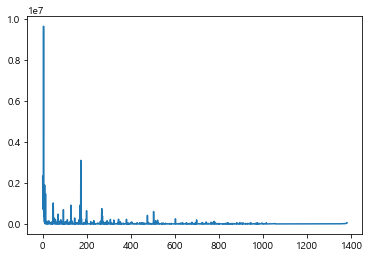

In [25]:
# 노출수 칼럼 시각화
df['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행

    1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
    2. to-be : 정렬된 value를 기준으로 출력
    
        2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
        2-2. 정렬된 데이터의 형태로 index 재생성 후 시각화

In [29]:
# 2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬
imp_sort = df['노출수'].sort_valueslues()
imp_sort

1057       1001
445        1003
597        1005
983        1006
442        1007
         ...   
13      1470452
9       1887822
0       2319456
173     3095998
4       9626374
Name: 노출수, Length: 1381, dtype: int64

In [31]:
# reset_index() - 인덱스 재생성, 기존 인덱스를 데이터프레임의 열로 반환
imp_sort=imp_sort.reset_index()
imp_sort

,index,노출수
0,1057,1001
1,445,1003
2,597,1005
3,983,1006
4,442,1007
...,...,...
1376,13,1470452
1377,9,1887822
1378,0,2319456
1379,173,3095998


In [33]:
# drop - 새 index 삭제
imp_sort.drop('index', axis=1,inplace=True)
imp_sort

,노출수
0,1001
1,1003
2,1005
3,1006
4,1007
...,...
1376,1470452
1377,1887822
1378,2319456
1379,3095998


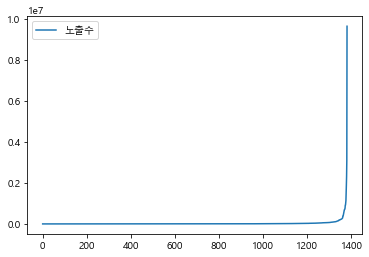

In [34]:
#imp_sort plotting
imp_sort.plot()
plt.show()

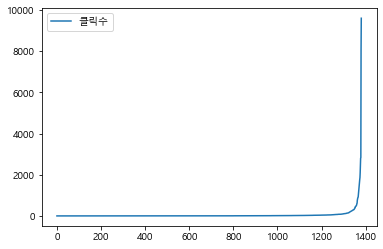

In [38]:
# 클릭수 칼럼 시각화
(((df['클릭수'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

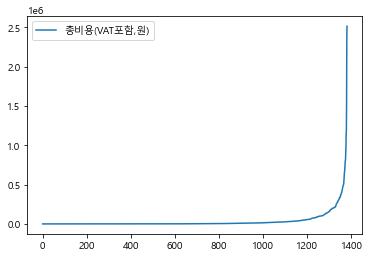

In [40]:
# 총비용 칼럼 시각화
(((df['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('index', axis=1)).plot()
plt.show()

# 4. 데이터 분석

## 중점관리키워드 추출

- 노출수, 클릭수 기준 상위 5%에 해당하는 키워드 추출
    1. 95백분위수 찾기(quantile 함수 사용)
    2. 95백분위수 이상(상위 5%)의 노출수 추출
    3. 상위 5%에 해당하는 키워드 추출

In [59]:
imp=df['노출수']
# 백분위수 찾기 - default : 2사분위(중앙값)
imp.quantile()

3805.0

In [60]:
# median - 중앙값
imp.median()

3805.0

In [61]:
print(imp.quantile(0)) # 최소값
print(imp.min())

1001.0
1001


In [62]:
# 최대값
print(imp.quantile(1))
print(imp.max())

9626374.0
9626374


In [63]:
# 95백분위수
imp.quantile(0.95)

82858.0

In [64]:
# 2. 95백분위수 이상(상위 5%)의 노출수 추출
imp=imp[imp>=imp.quantile(0.95)]
imp

0      2319456
1       767491
2      1137840
3       694106
4      9626374
        ...   
698     196862
741      94933
763      82858
777     126393
780      90041
Name: 노출수, Length: 70, dtype: int64

#### 3. 상위 5%에 해당하는 키워드 추출

In [65]:
df.head()

,광고그룹,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
0,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,-,2319456,9606.00,0.41,261.55,2512444
1,올인원 패키지 : 업무자동화_VBA,-,767491,8058.00,1.05,295.97,2384965
2,ㅍAOP 전체_중복키워드_디자인(삭제),일러스트,1137840,324.00,0.03,4841.66,1568699
3,올인원 패키지 : 데이터 분석 입문 온라인_파콘,-,694106,1863.60,0.27,630.59,1175174
4,3. html,HTML,9626374,813.60,0.01,1408.44,1145903


In [66]:
# 데이터프레임의 인덱스를 키워드로 변경
df_index=df.set_index('키워드')
df_index

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903
...,...,...,...,...,...,...
엑셀셀서식,올인원 패키지 : 업무자동화_3. 엑셀,24016,0.00,0.00,0.00,0
MATCH,올인원 패키지 : 업무자동화_3. 엑셀,32287,0.00,0.00,0.00,0
LTV,마케팅KPI수립,32602,0.00,0.00,0.00,0


In [67]:
imp=df_index['노출수']
imp

키워드
-           2319456
-            767491
일러스트        1137840
-            694106
HTML        9626374
             ...   
엑셀셀서식         24016
MATCH         32287
LTV           32602
DECISION      60844
REST          61193
Name: 노출수, Length: 1381, dtype: int64

In [68]:
imp=imp[imp>=imp.quantile(0.95)]
imp

키워드
-         2319456
-          767491
일러스트      1137840
-          694106
HTML      9626374
           ...   
부동산스터디     196862
가상메모리       94933
프로모션        82858
앱스토어       126393
OS          90041
Name: 노출수, Length: 70, dtype: int64

In [69]:
# 클릭수 상위 5% 키워드 추출
clk = df_index['클릭수']
clk=clk[clk>=clk.quantile(0.95)]
clk

키워드
-         9606.00
-         8058.00
일러스트       324.00
-         1863.60
HTML       813.60
            ...  
재태크        126.00
모스자격증      198.00
펀드하는법      248.40
채권투자       135.60
주식투자하는법    120.00
Name: 클릭수, Length: 70, dtype: float64

#### 노출수와 클릭수 모두 95% 이상

In [80]:
imp=df_index['노출수']
clk=df_index['클릭수']

In [83]:
result=df_index[(imp>=imp.quantile(0.95))&(clk>=clk.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
-,올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵,2319456,9606.00,0.41,261.55,2512444
-,올인원 패키지 : 업무자동화_VBA,767491,8058.00,1.05,295.97,2384965
일러스트,ㅍAOP 전체_중복키워드_디자인(삭제),1137840,324.00,0.03,4841.66,1568699
-,올인원 패키지 : 데이터 분석 입문 온라인_파콘,694106,1863.60,0.27,630.59,1175174
HTML,3. html,9626374,813.60,0.01,1408.44,1145903
파이썬,6. 파이썬,384522,260.40,0.07,3705.36,964876
코딩,1. 코딩,562162,271.20,0.05,3243.22,879560
C언어,2. C언어 일반,271370,153.60,0.06,5269.26,809358
가상화폐,프로그래밍 전체_파워컨텐츠_블록체인(삭제),91369,2838.00,3.11,283.22,803770


In [84]:
# index - 중점키워드 출력
result.index

Index(['-', '-', '일러스트', '-', 'HTML', '파이썬', '코딩', 'C언어', '가상화폐', '포토샵',
       '블록체인', '엑셀', '-', '포토샵', '컴퓨터활용능력', '컴퓨터활용능력2급', '컴퓨터활용능력1급', '포토샵',
       '-', '프리미어프로', '폰트', '스케치', '포토샵', '글씨체', '한글폰트', '마블', '바이럴마케팅'],
      dtype='object', name='키워드')

### 저효율 키워드 선별

- 노출수, 클릭수 기준 상위 5%의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 키워드
    1. 노출수 95% 미만
    2. 클릭수 95% 미만
    3. 총비용 85% 이상
    4. 총비용 95% 미만

In [85]:
# df_index로 cost변수 생성
cost= df_index['총비용(VAT포함,원)']

In [90]:
result=df_index[(imp<imp.quantile(0.95))&(clk<clk.quantile(0.95))&
                (cost>=cost.quantile(0.85))&(cost<cost.quantile(0.95))]
result

,광고그룹,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
키워드,,,,,,
온라인마케팅교육,올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅,4712,54.00,1.15,3460.11,186846
온라인마케팅,AOP 전체_중복키워드_마케팅,25645,43.20,0.17,4293.82,185493
어플제작비용,1. 모바일앱개발_교육,1786,69.60,3.90,2652.96,184646
부동산경매,fin_camp_auction_6,5087,50.40,0.99,3605.99,181742
퍼포먼스마케팅,마케터를 위한 데이터 부트캠프,5131,55.20,1.08,3274.89,180774
...,...,...,...,...,...,...
PHP,Python & Django를 활용한 웹 서비스_개발자,11304,13.20,0.12,3490.00,46068
UXUI,AOP 전체_중복키워드_디자인,8957,27.60,0.31,1645.22,45408
SQL,올인원 패키지 : 파이썬 웹 개발_3.FLASK기초,7980,12.00,0.15,3781.25,45375


In [88]:
result.index

Index(['온라인마케팅교육', '온라인마케팅', '어플제작비용', '부동산경매', '퍼포먼스마케팅', '블록체인', 'C++',
       '게임만드는프로그램', '엑셀배우기', '앱만들기', '영상제작', '쇼핑몰제작', '에프터이펙트', '어플리케이션제작',
       '강남빌딩매매', '웹디자인', '디지털마케팅', '포토샵강의', '구글애널리틱스자격증', 'PYTHON', '페이스북광고',
       '유튜브마케팅', '게임제작', '부동산투자', '마케팅전략', 'PYTHON', '홈페이지만들기', 'B2B사이트',
       'JAVASCRIPT', '파이썬강좌', '인스타그램광고', '동영상제작', 'SEO', '쇼핑몰창업', '인터넷쇼핑몰',
       '게임프로그래밍학원', '프로그래밍', '서울빌딩매매', '데이터사이언스', '모바일게임제작', '엑셀학원',
       '유튜브크리에이터', '엑셀VBA', '영상편집학원', '텐서플로우', '쇼핑몰홈페이지제작', '엑셀교육', '그로스해킹',
       '게임개발', '광고대행사', '통계학원', '모바일앱개발', '안드로이드앱만들기', '파이썬기초', '하이브리드앱',
       '온라인마케팅', '인디자인', '검색엔진최적화', '엑셀실무', '인터넷쇼핑몰제작', '상가빌딩매매', '퍼포먼스마케팅',
       '쇼핑몰', 'UX디자인', '유니티강좌', 'VBA', '코딩이란', 'SNS마케팅', 'GA자격증', '콘텐츠제작',
       '구글애널리틱스', 'UI디자인', '1인미디어', '포토샵자격증', '하이브리드앱', '포토샵자격증', '브랜드네이밍',
       '리플렛디자인', '데이터사이언티스트', '유니티3D', '자바스크립트', '일러스트레이터강좌', '데이터분석준전문가',
       '유튜브편집', '모션그래픽', '리플렛디자인', 'SPRING', '어도비일러스트레이터', 'SNS광고', '쇼핑몰촬영',
       '브랜드마케팅', '데이터분

## 광고그룹 분석

### as-is : 키워드 기준 분석
    
- 키워드의 노출수/클릭수/총비용 등
    
### to-be : 광고그룹 기준 분석
    
- 데이터의 구성을 광고 그룹 기준으로 변경해야 함
- 광고그룹의 노출수/클릭수/총비용 등
- groupby 함수 사용

In [93]:
# groupby - 전달된 열을 기준으로 전체 데이터를 분류
grouped=df.groupby('광고그룹')
grouped

In [95]:
# count - 각 광고그룹 데이터의 개수
grouped.count()

,키워드,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,,
#000_마케팅 전체_main,48,48,48,48,48,48
001.BASIC DESIGN,9,9,9,9,9,9
001.데이터분석/ 통계,10,10,10,10,10,10
002.R,9,9,9,9,9,9
002.UX/UI,5,5,5,5,5,5
...,...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,13,13,13,13,13,13
프로그래밍 유치원,8,8,8,8,8,8
프로그래밍 전체,12,12,12,12,12,12


In [96]:
# mean - 각 광고그룹 데이터의 평균
grouped.mean()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,14780.15,8.40,0.18,625.09,7243.96
001.BASIC DESIGN,5738.56,6.80,0.23,298.69,2427.33
001.데이터분석/ 통계,3715.00,20.28,0.89,1021.47,19575.60
002.R,13413.78,8.53,0.11,360.04,4796.00
002.UX/UI,3090.80,4.08,0.09,69.93,550.00
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,72092.69,16.71,0.05,648.33,15781.62
프로그래밍 유치원,5921.62,7.80,0.22,2032.33,23617.00
프로그래밍 전체,90375.00,9.20,0.02,123.88,1626.17


### 광고그룹 기준 데이터 전처리

In [98]:
# 그룹데이터의 합계 - 노출수, 클릭수, 총비용 칼럼
grouped.sum()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,8.83,30004.14,347710
001.BASIC DESIGN,51647,61.20,2.10,2688.24,21846
001.데이터분석/ 통계,37150,202.80,8.91,10214.73,195756
002.R,120724,76.80,1.00,3240.35,43164
002.UX/UI,15454,20.40,0.45,349.64,2750
...,...,...,...,...,...
포토샵 유치원_일러스트레이터 유치원,937205,217.20,0.66,8428.26,205161
프로그래밍 유치원,47373,62.40,1.80,16258.61,188936
프로그래밍 전체,1084500,110.40,0.29,1486.58,19514


In [101]:
df_group=grouped.sum()
# 클릭률 = 클릭수 / 노출수
df_group['클릭률(%)']=df_group['클릭수']/df_group['노출수']
# 평균클릭비용 = 총비용 / 클릭수
df_group['평균클릭비용(VAT포함,원)'] = df_group['총비용(VAT포함,원)']/df_group['클릭수']

In [102]:
# 클릭수 칼럼 중 0인 데이터가 존재 -> 결측값이 존재
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,NaN,0
fin_camp_business_4,2136,0.00,0.00,NaN,0
fin_camp_rfs_9,1928,0.00,0.00,NaN,0
다함께 DDD 프로젝트,3689,0.00,0.00,NaN,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,NaN,0


In [104]:
# fillna
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].fillna(0)
df_group[df_group['클릭수']==0]

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
Hyperledger Fabric 프로젝트 CAMP,1990,0.00,0.00,0.00,0
fin_camp_business_4,2136,0.00,0.00,0.00,0
fin_camp_rfs_9,1928,0.00,0.00,0.00,0
다함께 DDD 프로젝트,3689,0.00,0.00,0.00,0
올인원 패키지 : 디지털 마케팅_인스타광고,1377,0.00,0.00,0.00,0


In [106]:
# 평균클릭비용 칼럼 반올림처리, 소수점 제거
df_group['평균클릭비용(VAT포함,원)']=round(df_group['평균클릭비용(VAT포함,원)'],0)
df_group['평균클릭비용(VAT포함,원)']=df_group['평균클릭비용(VAT포함,원)'].astype(int)
df_group.head()

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,0.00,862,347710
001.BASIC DESIGN,51647,61.20,0.00,357,21846
001.데이터분석/ 통계,37150,202.80,0.01,965,195756
002.R,120724,76.80,0.00,562,43164
002.UX/UI,15454,20.40,0.00,135,2750


### 데이터 시각화

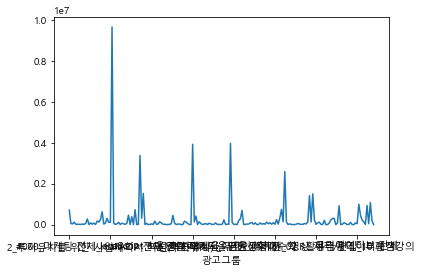

In [114]:
# 노출수 칼럼 선그래프
df_group['노출수'].plot()
plt.show()

- 명확한 패턴이 보일 수 있도록 데이터시각화 진행

    1. as-is : index를 기준으로 출력(그래프의 x축이 시리즈의 인덱스)
    2. to-be : 정렬된 value를 기준으로 출력
    
        2-1. 시리즈의 value를 수치 순서대로 오름차순 정렬<br>
        2-2. 정렬된 데이터의 형태로 index 재생성 후 시각화

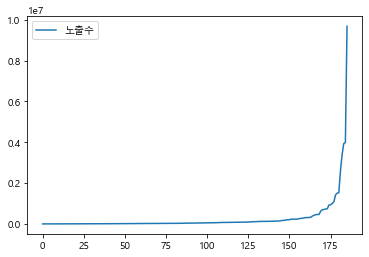

In [116]:
# 노출수 칼럼 선그래프
(((df_group['노출수'].sort_values()).reset_index()).drop('광고그룹', axis=1)).plot()
plt.show()

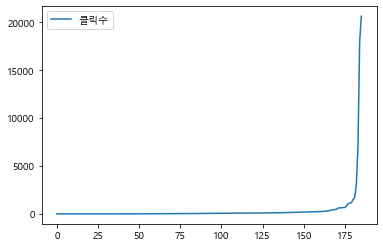

In [117]:
# 클릭수 칼럼 선그래프
(((df_group['클릭수'].sort_values()).reset_index()).drop('광고그룹', axis=1)).plot()
plt.show()

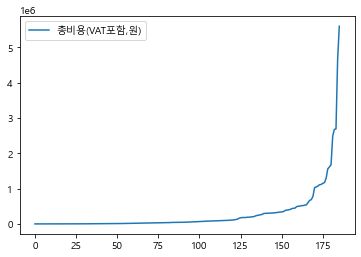

In [119]:
# 총비용 칼럼 선그래프
(((df_group['총비용(VAT포함,원)'].sort_values()).reset_index()).drop('광고그룹', axis=1)).plot()
plt.show()

### 중점관리 광고그룹 / 저효율 광고그룹

- 중점관리 광고그룹
    1. 상위 20%
    2. 상위 10%

In [120]:
# df_group에서 imp, clk 변수 생성
imp = df_group['노출수']
clk = df_group['클릭수']

In [121]:
result=df_group[(imp>=imp.quantile(0.8))&(clk>=clk.quantile(0.9))]
result

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
#000_마케팅 전체_main,709447,403.20,0.00,862,347710
1. 코딩,630038,673.20,0.00,2490,1676125
3. html,9683503,829.20,0.00,1389,1151601
6. 파이썬,465292,488.40,0.00,3192,1559107
AOP 전체_중복키워드_디자인,3388256,1174.80,0.00,2120,2490708
AOP 전체_중복키워드_비지니스,1528568,634.80,0.00,1762,1118678
ㅍAOP 전체_중복키워드_디자인(삭제),3936637,1051.20,0.00,2561,2692591
마케팅 전체,3984480,421.20,0.00,227,95546
올인원 패키지 : 데이터 분석 입문 온라인_파콘,742689,3079.20,0.00,524,1614151


In [122]:
result.index

Index(['#000_마케팅 전체_main', '1. 코딩', '3. html', '6. 파이썬', 'AOP 전체_중복키워드_디자인',
       'AOP 전체_중복키워드_비지니스', 'ㅍAOP 전체_중복키워드_디자인(삭제)', '마케팅 전체',
       '올인원 패키지 : 데이터 분석 입문 온라인_파콘', '올인원 패키지 : 디자인 툴_파워컨텐츠_포토샵',
       '올인원 패키지 : 업무자동화_VBA', '타이포그래피와 편집디자인', '프로그래밍 전체_파워컨텐츠_블록체인(삭제)'],
      dtype='object', name='광고그룹')

- 저효율 광고그룹 : 노출수, 클릭수 기준 상위의 키워드가 아닌데도 불구하고 비용이 많이 쓰이고 있는 광고그룹

    1. 노출수 80% 미만
    2. 클릭수 90% 미만
    3. 총비용 60% 이상
    4. 총비용 90% 미만

In [123]:
# df_group에서 cost 변수 생성
cost = df_group['총비용(VAT포함,원)']

In [124]:
result=df_group[(imp<imp.quantile(0.8))&(clk<clk.quantile(0.9))&
                (cost>=cost.quantile(0.6))&(cost<cost.quantile(0.9))]
result

,노출수,클릭수,클릭률(%),"평균클릭비용(VAT포함,원)","총비용(VAT포함,원)"
광고그룹,,,,,
001.데이터분석/ 통계,37150,202.80,0.01,965,195756
002.마케팅 입문,20372,188.40,0.01,570,107371
003.퍼포먼스 마케팅,10453,164.40,0.02,3152,518177
1. 전체,124351,128.40,0.00,1409,180906
2. 프로그래밍,109531,182.40,0.00,2239,408364
5. 자료구조,40328,46.80,0.00,4317,202037
AOP 전체_중복키워드_공통,4336,66.00,0.02,4624,305195
AOP 전체_중복키워드_데이터사이언스,14439,56.40,0.00,4728,266640
AOP 전체_중복키워드_프로그래밍,7580,39.60,0.01,7432,294316


In [125]:
result.index

Index(['001.데이터분석/ 통계', '002.마케팅 입문', '003.퍼포먼스 마케팅', '1. 전체', '2. 프로그래밍',
       '5. 자료구조', 'AOP 전체_중복키워드_공통', 'AOP 전체_중복키워드_데이터사이언스',
       'AOP 전체_중복키워드_프로그래밍', 'JavaScript BOOT CAMP',
       'Python & Django를 활용한 웹 서비스_개발자', 'SEO/SEM 전략',
       'TensorFlow로 시작하는 딥러닝 입문', 'fin_camp_auction_6', 'ㅍAOP 전체_중복키워드_공통(삭제)',
       'ㅍAOP 전체_중복키워드_마케팅(삭제)', 'ㅍAOP 전체_중복키워드_프로그래밍(삭제)',
       'ㅍ올인원 패키지 : UX/UI 디자인 입문_연관검색어(삭제)', 'ㅍ올인원 패키지 : 브랜딩',
       '고객의 마음을 읽는 구글애널리틱스', '대기업을 이기는 브랜딩 전략', '마케터를 위한 데이터 부트캠프',
       '마케터를 위한 데이터 해석 실전', '마케팅 유치원', '마케팅KPI수립',
       '올인원 패키지 : 1인 쇼핑몰 시작하기_02.쇼핑몰구축', '올인원 패키지 : 1인 쇼핑몰_00.창업_MO',
       '올인원 패키지 : UX/UI 디자인 입문_연관검색어', '올인원 패키지 : 그로스해킹_5.마케팅 분석',
       '올인원 패키지 : 디지털 마케팅_1. 디지털 마케팅', '올인원 패키지 : 브랜딩',
       '올인원 패키지 : 업무자동화_1. 자동화', '올인원 패키지 : 업무자동화_4. VBA',
       '올인원 패키지 : 영상 제작/편집_9.유튜브/유튜버', '왕초보의 파이썬 웹 프로그래밍 CAMP',
       '코딩으로 여행하는 블록체인 서비스', '페이스북&인스타그램 마케팅 실전', '프로그래밍 유치원'],
      dtype='object', name='광고그룹')